## 

### SUPERVISED CLASSIFICATION

Read the “data” dataset to perform the following

# New Section

In [ ]:
# importing library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

### 1. Data Understanding (5 marks)

:a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What do you understand from the dataset? (1 MARK)


In [ ]:
df = pd.read_csv('hypertension.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


b. Calculate five-point summary for numerical variables (1 MARK)

In [ ]:
five_summary = df.describe().transpose()[['min', '25%', '50%', '75%', 'max']]
print(five_summary)


                     min        25%        50%       75%       max
id                 67.00  17741.250  36932.000  54682.00  72940.00
age                 0.08     25.000     45.000     61.00     82.00
hypertension        0.00      0.000      0.000      0.00      1.00
heart_disease       0.00      0.000      0.000      0.00      1.00
avg_glucose_level  55.12     77.245     91.885    114.09    271.74
bmi                10.30     23.500     28.100     33.10     97.60
stroke              0.00      0.000      0.000      0.00      1.00


c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
  print(f"Summary for{column}:")
  counts = df[column].value_counts()
  print("\n precentage distribution:")
  precentage = df[column].value_counts(normalize=True)*100
  summary = pd.DataFrame({'Count':counts,'Precentage':precentage}).round()
  print(summary)
  print("\n")

Summary forgender:

 precentage distribution:
        Count  Precentage
Female   2994        59.0
Male     2115        41.0
Other       1         0.0


Summary forever_married:

 precentage distribution:
     Count  Precentage
Yes   3353        66.0
No    1757        34.0


Summary forwork_type:

 precentage distribution:
               Count  Precentage
Private         2925        57.0
Self-employed    819        16.0
children         687        13.0
Govt_job         657        13.0
Never_worked      22         0.0


Summary forResidence_type:

 precentage distribution:
       Count  Precentage
Urban   2596        51.0
Rural   2514        49.0


Summary forsmoking_status:

 precentage distribution:
                 Count  Precentage
never smoked      1892        37.0
Unknown           1544        30.0
formerly smoked    885        17.0
smokes             789        15.0




d. Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. (2 marks)


In [ ]:
#missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)
print("\n")

#null values
null_values = df.isnull()
print("Null Values:")
print(null_values)
print("\n")

#outliers
numerical_columns = df.select_dtypes(include = np.number).columns
def detect_outliers(data):
  A1 = data.quantile(0.25)
  A2 = data.quantile(0.75)
  A3 = A1 + A2
  lower_bound = A1 - 1.5 * A3
  upper_bound = A2 + 1.5 * A3
  outliers = (data < lower_bound) | (data > upper_bound)
  return outliers
outliers_df = df[numerical_columns].apply(detect_outliers)
print("Outliers:")
print(outliers_df)
print("\n")

#class imbalance
if 'target_column' in df.columns:
  class_distribution = df['target_column'].values_counts()
  print("class Distribution:")
  pritn(class_distribution)
  print("\n")

  sns.countplot(x = 'target_column', data = df)
  plt.title("Class Distribution")
  plt.show()
else:
  print("No target column found for class distribution.")
  print("\n")

Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Null Values:
         id  gender    age  hypertension  heart_disease  ever_married  \
0     False   False  False         False          False         False   
1     False   False  False         False          False         False   
2     False   False  False         False          False         False   
3     False   False  False         False          False         False   
4     False   False  False         False          False         False   
...     ...     ...    ...           ...            ...           ...   
5105  False   False  False         False          False         False   
5106  False   False  False         False          False         False   

###  2.  Data Preparation (15 marks)


a. Fix the defects if any and do appropriate treatment if any. (4 marks)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


numerical_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(exclude=np.number).columns

imputer_numerical = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = imputer_numerical.fit_transform(df[numerical_columns])
df[categorical_columns] = imputer_categorical.fit_transform(df[categorical_columns])


print("After handling missing values:")
print(df.isnull().sum())
print("\n")


def winsorize_outliers(data):
    lower_bound = data.quantile(0.05)
    upper_bound = data.quantile(0.95)
    data = np.where(data < lower_bound, lower_bound, data)
    data = np.where(data > upper_bound, upper_bound, data)
    return data

df[numerical_columns] = df[numerical_columns].apply(winsorize_outliers)


print("After handling outliers:")
print(df.describe())
print("\n")


if 'target_column' in df.columns:
    class_distribution = df['target_column'].value_counts()
    print("Before handling class imbalance:")
    print(class_distribution)
    print("\n")


    oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(df.drop('target_column', axis=1), df['target_column'])


    df_resampled = pd.concat([X_resampled, y_resampled], axis=1)


    print("After handling class imbalance:")
    print(df_resampled['target_column'].value_counts())
    print("\n")


    sns.countplot(x='target_column', data=df_resampled)
    plt.title("Balanced Class Distribution")
    plt.show()
else:
    print("No target column found for class distribution.")
    print("\n")


After handling missing values:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


After handling outliers:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36512.038239    43.304501      0.097456       0.054012   
std    20863.099752    22.233781      0.296607       0.226063   
min     3590.450000     5.000000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    69217.950000    79.000000      1.000000       1.000000   

       avg_glucose_level          bmi  stroke  
count        5110.0

b. Visualize the data using relevant plots and explain the idea behind your choice of plot. Find out the variables which are highly correlated with Target? (4 marks)

Column Names:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


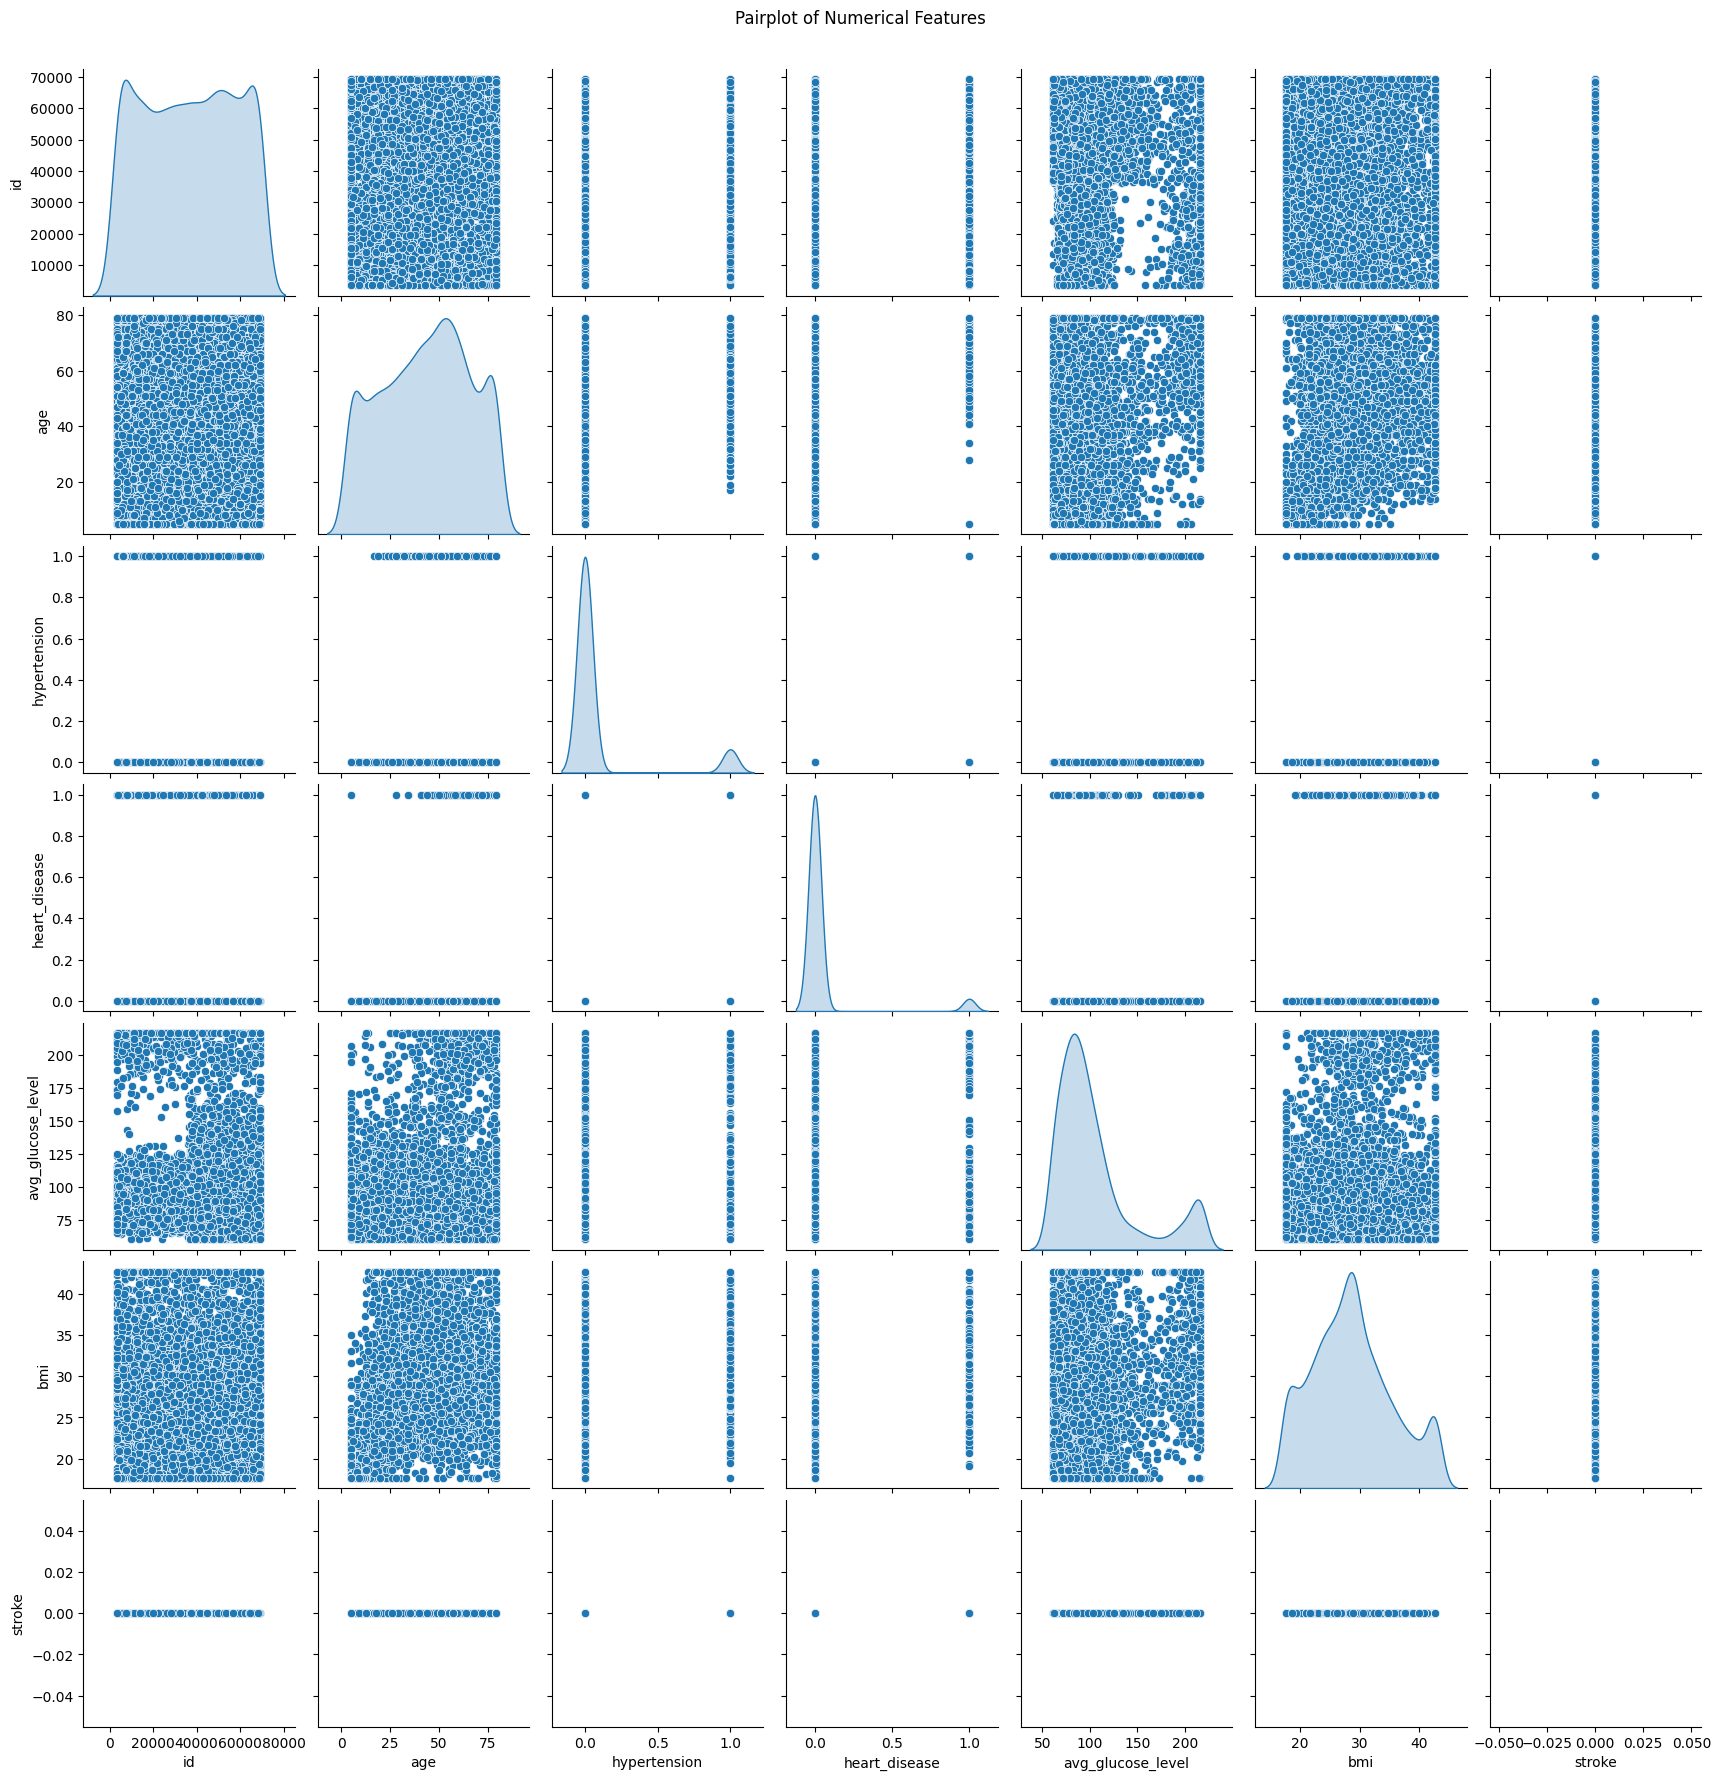

<ipython-input-9-910164066f40>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


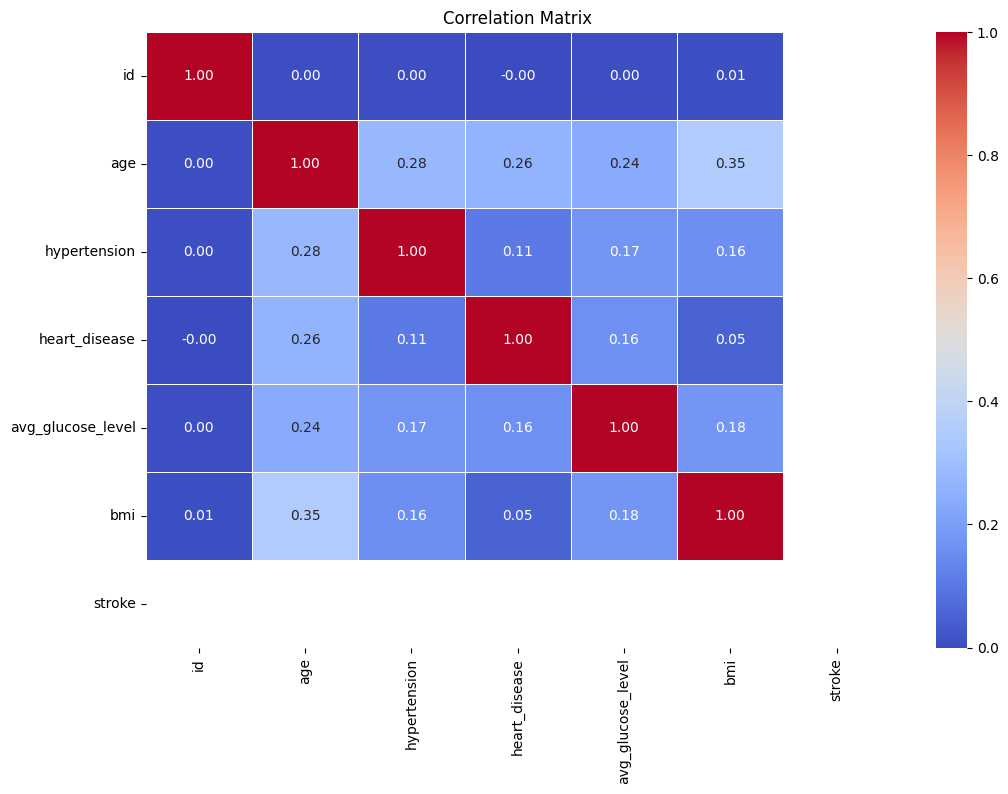

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Column Names:")
print(df.columns)

sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


\c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take before moving ahead with model creation? Tell us the reason behind your choice of action.(4 marks)


d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks)

In [ ]:
print("Column Names:")
print(df.columns)

if 'target_column' in df.columns:
    print("Column exists!")
else:
    print("Column does not exist!")

print(df.head())


Column Names:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Column does not exist!
         id  gender   age  hypertension  heart_disease ever_married  \
0   9046.00    Male  67.0           0.0            1.0          Yes   
1  51676.00  Female  61.0           0.0            0.0          Yes   
2  31112.00    Male  79.0           0.0            1.0          Yes   
3  60182.00  Female  49.0           0.0            0.0          Yes   
4   3590.45  Female  79.0           1.0            0.0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban           216.2945  36.600000   
1  Self-employed          Rural           202.2100  28.893237   
2        Private          Rural           105.9200  32.500000   
3        Private          Urban           171.2300  34.400000   
4  Self-

### 3. Model Building (20 marks)

a. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set (4 marks)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


target_column_name = 'stroke'


X = df.drop(target_column_name, axis=1)
y = df[target_column_name]


categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

numerical_columns = list(set(X.columns) - set(categorical_columns))

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


decision_tree_model = DecisionTreeClassifier(criterion='gini', random_state=42)


decision_tree_model.fit(X_train_transformed, y_train)


y_pred = decision_tree_model.predict(X_test_transformed)


accuracy = accuracy_score(y_test, y_pred)


correct_predictions = accuracy_score(y_test, y_pred, normalize=False)

print("Accuracy on the Test Set:", accuracy)
print("Number of Correctly Predicted Instances:", correct_predictions)


Accuracy on the Test Set: 1.0
Number of Correctly Predicted Instances: 1533


 b. What is the overall Accuracy? Please comment on it (3 mark)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on the Test Set:", accuracy)



Accuracy on the Test Set: 1.0


c. Evaluate the model built using Precision, Recall and F1 Score and interpret the results with inferences (4 marks)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Confusion Matrix:
 [[1533]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1533

    accuracy                           1.00      1533
   macro avg       1.00      1.00      1.00      1533
weighted avg       1.00      1.00      1.00      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


d. Build a logistic regression model and compare the performance of the same with decision tree. What are your inferences? (4 marks)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('hypertension.csv')

df['bmi'] = df['bmi'].replace('N/A', None)
df['bmi'] = df['bmi'].astype(float)
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

X = df[categorical_features + numeric_features]

y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9393346379647749

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
 [[960   0]
 [ 62   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
